<a href="https://colab.research.google.com/github/Guneshwar24/ACIT4610-Evolutionary-Algo/blob/main/BEES_ALGO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BEES ALGORITHM

Enter the size of the board (n) (default 8): 8
Enter the number of bees (default 200): 
Enter the number of elite bees (default 4): 
Enter the number of generations (default 1000): 
Enter the initial position for the first queen (0 to n-1) or 'random': 0,1,2,3,4,5,6,7


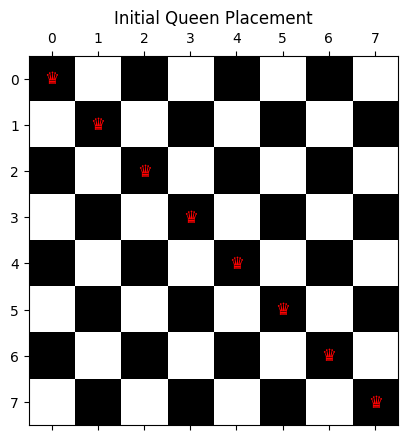

Generation 0: Best Fitness = 7
Solution found in generation 1: 
Final solution:


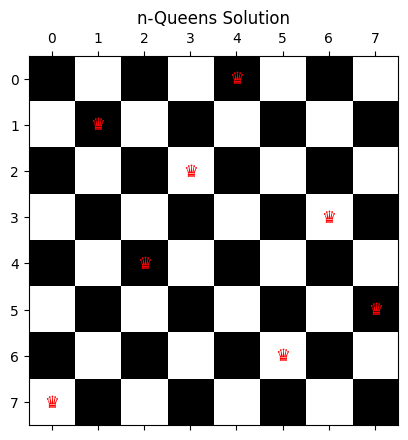

[4, 1, 3, 6, 2, 7, 5, 0]
Time taken to find a solution: 0.02 seconds


In [2]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

def initialize_population(num_bees, n, initial_queen_placement=None):
    population = [initial_queen_placement] if initial_queen_placement else []
    population.extend([[random.randint(0, n-1) for _ in range(n)] for _ in range(num_bees - len(population))])
    return population

def check_clashes(queen_positions):
    clashes = 0
    n = len(queen_positions)
    for i in range(n):
        for j in range(i+1, n):
            if queen_positions[i] == queen_positions[j] or \
               abs(queen_positions[i] - queen_positions[j]) == j - i:
                clashes += 1
    return clashes

def fitness(queen_positions):
    return len(queen_positions) - check_clashes(queen_positions)

def select_elite_bees(population, fitnesses, num_elite_bees):
    sorted_bees = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    return [bee for bee, fit in sorted_bees[:num_elite_bees]]

def perform_bee_dance(bee):
    n = len(bee)
    neighbor_bee = bee[:]
    i = random.randint(0, n-1)
    neighbor_bee[i] = random.randint(0, n-1)
    return neighbor_bee

def bee_algorithm(n, num_bees, num_elite_bees, num_generations, initial_queen_placement):
    population = initialize_population(num_bees, n, initial_queen_placement)
    best_solution = None
    best_fitness = -1

    for generation in range(num_generations):
        fitnesses = [fitness(bee) for bee in population]
        elite_bees = select_elite_bees(population, fitnesses, num_elite_bees)
        new_population = []

        for bee in elite_bees:
            for _ in range(num_bees // num_elite_bees):
                neighbor_bee = perform_bee_dance(bee)
                new_population.append(neighbor_bee)

        for _ in range(num_bees - len(new_population)):
            new_population.append(initialize_population(1, n)[0])

        for bee, fit in zip(new_population, [fitness(b) for b in new_population]):
            if fit > best_fitness:
                best_solution, best_fitness = bee, fit

        if best_fitness == n:
            print("Solution found in generation {}: ".format(generation))
            return best_solution

        print("Generation {}: Best Fitness = {}".format(generation, best_fitness))
        population = new_population

    print("No solution found.")
    return None

def print_board(solution, title="n-Queens Solution"):
    if solution is None:
        print("No solution found, so no plot will be generated.")
        return

    board_size = len(solution)
    chessboard = np.zeros((board_size, board_size), dtype=int)
    for i in range(board_size):
        for j in range(board_size):
            if (i + j) % 2 == 0:
                chessboard[i][j] = 1
    fig, ax = plt.subplots()
    cmap = plt.get_cmap('binary', 2)
    ax.matshow(chessboard, cmap=cmap)
    queen = u'\u265B'  # Unicode character for queen
    for row, col in enumerate(solution):
        ax.text(col, row, queen, va='center', ha='center', color='red', fontsize=12)
    plt.title(title)
    plt.show()

def get_input(prompt, default):
    value = input(f"{prompt} (default {default}): ").strip()
    return int(value) if value else default

if __name__ == "__main__":
    n = get_input("Enter the size of the board (n)", 8)
    num_bees = get_input("Enter the number of bees", 200)
    num_elite_bees = get_input("Enter the number of elite bees", 4)
    num_generations = get_input("Enter the number of generations", 1000)

    while True:
        initial_queen_placement = input("Enter the initial position for the first queen (0 to n-1) or 'random': ").strip()
        if initial_queen_placement.lower() == 'random':
            initial_queen_placement = None
            break
        else:
            try:
                initial_queen_placement = [int(x) for x in initial_queen_placement.split(',') if x.strip().isdigit()]
                if len(initial_queen_placement) == n:
                    print_board(initial_queen_placement, "Initial Queen Placement")
                    break
                else:
                    print(f"Invalid input. Please enter a list of {n} integers separated by commas, or 'random'.")
            except ValueError:
                print("Invalid input. Make sure to enter numbers separated by commas.")

    start_time = time.time()
    solution = bee_algorithm(n, num_bees, num_elite_bees, num_generations, initial_queen_placement)
    elapsed_time = time.time() - start_time

    if solution:
        print("Final solution:")
        print_board(solution)
        print(solution)
        print(f"Time taken to find a solution: {elapsed_time:.2f} seconds")
    else:
        print(f"No solution found in {elapsed_time:.2f} seconds.")